In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression

# Set style for better visualizations
plt.style.use('seaborn-v0_8-notebook')
sns.set_palette("husl")

In [4]:
df = pd.read_csv('../data/dataset.csv')
df.head()

,score,release_year,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,...,loudness,speechiness,valence,tempo,explicit,song_type,followers,popularity,artist_type,main_genre
0,133,1989,300440,7,1,4,0.181000,0.763,0.440,0.000457,...,-13.110,0.0388,0.4210,120.492,False,Solo,226699.0,61.0,band,dance pop
1,35,2009,215814,2,1,4,0.006300,0.600,0.153,0.855000,...,-14.028,0.0492,0.2550,172.050,False,Solo,11647.0,28.0,-,-
2,485,2003,233267,7,1,4,0.000065,0.553,0.717,0.128000,...,-5.857,0.0318,0.3180,127.947,False,Solo,1545572.0,72.0,band,modern rock
3,268,2018,193680,1,0,4,0.082200,0.353,0.755,0.000000,...,-6.276,0.7330,0.4370,191.153,False,Solo,5856419.0,84.0,singer,canadian contemporary r&b
4,1209,1994,291800,7,1,4,0.236000,0.348,0.924,0.000000,...,-3.048,0.0945,0.0869,114.117,False,Solo,243179.0,56.0,-,album rock


In [104]:
df

,score,release_year,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,...,valence,tempo,explicit,song_type,followers,popularity,artist_type,main_genre,log_score,duration_s
0,133,1989,300440,7,1,4,0.181000,0.763,0.440,0.000457,...,0.4210,120.492,False,Solo,226699.0,61.0,band,dance pop,4.897840,300.440
1,35,2009,215814,2,1,4,0.006300,0.600,0.153,0.855000,...,0.2550,172.050,False,Solo,11647.0,28.0,-,-,3.583519,215.814
2,485,2003,233267,7,1,4,0.000065,0.553,0.717,0.128000,...,0.3180,127.947,False,Solo,1545572.0,72.0,band,modern rock,6.186209,233.267
3,268,2018,193680,1,0,4,0.082200,0.353,0.755,0.000000,...,0.4370,191.153,False,Solo,5856419.0,84.0,singer,canadian contemporary r&b,5.594711,193.680
4,1209,1994,291800,7,1,4,0.236000,0.348,0.924,0.000000,...,0.0869,114.117,False,Solo,243179.0,56.0,-,album rock,7.098376,291.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20397,5779,1998,318773,11,1,4,0.315000,0.391,0.514,0.000006,...,0.4370,177.872,False,Solo,74445.0,56.0,singer,ectofolk,8.662159,318.773
20398,153,1966,206427,2,0,4,0.100000,0.489,0.531,0.000000,...,0.6120,153.589,False,Solo,15728.0,46.0,-,brill building pop,5.036953,206.427
20399,623,1989,258147,0,1,4,0.000833,0.585,0.906,0.018900,...,0.7470,122.132,False,Solo,1283375.0,71.0,band,album rock,6.436150,258.147
20400,1403,2004,202760,7,1,4,0.123000,0.443,0.885,0.000031,...,0.5360,185.034,False,Solo,735490.0,65.0,duo,contemporary country,7.247081,202.760


In [7]:
df.dtypes

score                 int64
release_year          int64
duration_ms           int64
key                   int64
mode                  int64
time_signature        int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
valence             float64
tempo               float64
explicit               bool
song_type            object
followers           float64
popularity          float64
artist_type          object
main_genre           object
log_score           float64
dtype: object

In [13]:
df.describe()

,score,release_year,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,followers,popularity,log_score
count,20402.000000,20402.000000,2.040200e+04,20402.000000,20402.000000,20402.000000,20402.000000,20402.000000,20402.000000,20402.000000,20402.000000,20402.000000,20402.000000,20402.000000,20402.000000,2.039900e+04,20400.000000,20402.000000
mean,777.384521,1987.499069,2.295247e+05,5.224537,0.726988,3.943584,0.265215,0.600356,0.625031,0.047551,0.192274,-8.845347,0.067533,0.607777,120.310803,1.786720e+06,57.540735,5.934327
std,766.740996,16.414883,6.696398e+04,3.566935,0.445518,0.289183,0.264377,0.150620,0.197119,0.168430,0.163929,3.593065,0.074373,0.236530,27.683967,4.804166e+06,21.160421,1.518969
min,1.000000,1964.000000,2.460400e+04,0.000000,0.000000,0.000000,0.000001,0.000000,0.006640,0.000000,0.013000,-30.896000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.693147
25%,170.000000,1972.250000,1.864930e+05,2.000000,0.000000,4.000000,0.039200,0.502000,0.481000,0.000000,0.088300,-11.217750,0.031900,0.427000,99.734250,2.629000e+04,44.000000,5.141664
50%,563.000000,1985.000000,2.230260e+05,5.000000,1.000000,4.000000,0.169500,0.608000,0.640000,0.000010,0.129000,-8.471000,0.040400,0.632000,118.951000,2.712920e+05,61.000000,6.335054
75%,1181.000000,2002.000000,2.596930e+05,8.000000,1.000000,4.000000,0.440000,0.706000,0.783000,0.001107,0.249000,-6.051000,0.063000,0.804000,135.898250,1.253545e+06,73.000000,7.074963
max,6851.000000,2018.000000,1.561133e+06,11.000000,1.000000,5.000000,0.995000,0.988000,0.998000,0.985000,0.997000,3.440000,0.950000,1.000000,231.028000,4.980672e+07,100.000000,8.832296


In [11]:
df.isnull().sum()

score               0
release_year        0
duration_ms         0
key                 0
mode                0
time_signature      0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
valence             0
tempo               0
explicit            0
song_type           0
followers           3
popularity          2
artist_type         2
main_genre          2
log_score           0
dtype: int64

In [28]:
df.release_year.value_counts()

release_year
1967    629
1966    628
1964    612
1965    611
1968    578
1969    566
1972    495
1971    491
1970    491
2010    445
1975    436
1974    435
1973    432
1976    426
1983    410
2018    408
2009    407
1979    401
1977    396
1978    381
1982    375
1984    372
2008    368
1980    360
1981    353
1986    350
1985    349
2006    347
1987    345
1988    344
1989    339
1990    332
1991    332
2007    331
2005    330
1992    319
1999    309
2000    302
2011    301
2004    297
1994    295
1993    293
2003    291
1998    290
2002    280
2001    278
1995    274
2016    273
2017    272
1996    253
1997    249
2014    238
2015    235
2013    232
2012    216
Name: count, dtype: int64

In [31]:
df.explicit.value_counts(normalize=True)

explicit
False    0.918537
True     0.081463
Name: proportion, dtype: float64

In [33]:
df.song_type.value_counts(normalize=True)

song_type
Solo             0.930056
Collaboration    0.069944
Name: proportion, dtype: float64

In [35]:
df.artist_type.value_counts(normalize=True)

artist_type
singer    0.394069
band      0.332108
-         0.204118
rapper    0.043873
duo       0.022451
DJ        0.003382
Name: proportion, dtype: float64

In [37]:
df.main_genre.value_counts(normalize=True)

main_genre
album rock                  0.108725
-                           0.108284
adult standards             0.084314
dance pop                   0.081422
contemporary country        0.057990
                              ...   
electrofox                  0.000049
deep classic garage rock    0.000049
musica infantil             0.000049
nederpop                    0.000049
indie folk                  0.000049
Name: proportion, Length: 492, dtype: float64

In [50]:
df.main_genre.unique()

array(['dance pop', '-', 'modern rock', 'canadian contemporary r&b',
       'album rock', 'arkansas country', 'dance rock', 'dancehall',
       'canadian pop', 'classic rock', 'alternative hip hop',
       'classic soul', 'brill building pop', 'alternative pop',
       'blues-rock', 'glam metal', 'grunge pop', 'reggae',
       'classic uk pop', 'contemporary country', 'australian pop',
       'adult standards', 'acoustic pop', 'motown', 'hip hop',
       'beach music', 'art rock', 'karaoke', 'east coast hip hop',
       'chicago drill', 'emo rap', 'classic canadian rock', 'bass trap',
       'soft rock', 'freestyle', 'chicago soul', 'cowpunk',
       'british soul', 'atl hip hop', 'bluegrass', 'alternative metal',
       'funk', 'jazz blues', 'detroit hip hop', 'bow pop', 'idol',
       'rhythm and blues', 'chicago rap', 'country road',
       'british invasion', 'crunk', 'afrobeat', 'art pop', 'neo soul',
       'alternative rock', 'space age pop', 'classic girl group',
       'euroda

In [43]:
df.followers.mean()

1786719.5269375949

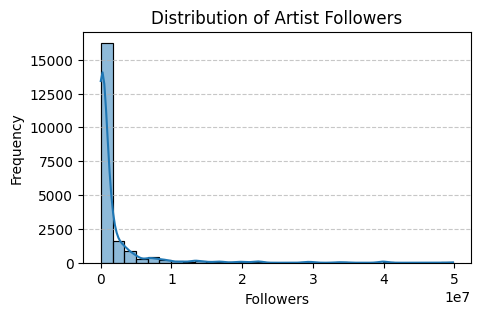

In [58]:
plt.figure(figsize=(5, 3))
sns.histplot(df.followers, bins=30, kde=True)

plt.xlabel('Followers')
plt.ylabel('Frequency')
plt.title('Distribution of Artist Followers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

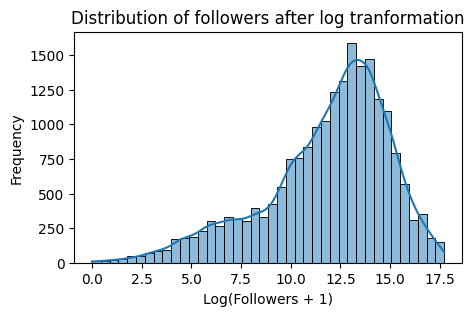

In [62]:
log_followers = np.log1p(df.followers)

plt.figure(figsize=(5, 3))

sns.histplot(log_followers, bins=40, kde=True)
plt.ylabel('Frequency')
plt.xlabel('Log(Followers + 1)')
plt.title('Distribution of followers after log tranformation')

plt.show()

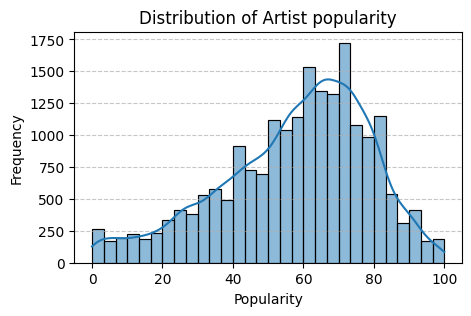

In [63]:
plt.figure(figsize=(5, 3))
sns.histplot(df.popularity, bins=30, kde=True)

plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Artist popularity')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [71]:
df['duration_s'] = df.duration_ms/1000

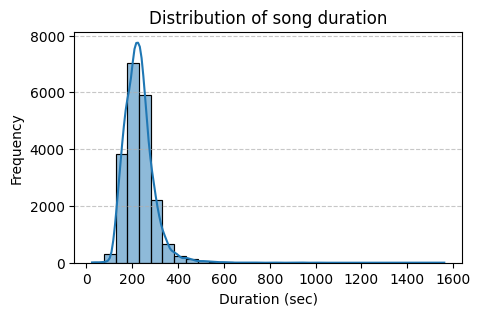

In [72]:
plt.figure(figsize=(5, 3))
sns.histplot(df.duration_s, bins=30, kde=True)

plt.xlabel('Duration (sec)')
plt.ylabel('Frequency')
plt.title('Distribution of song duration')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

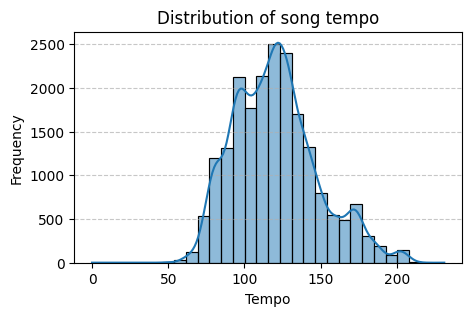

In [73]:
plt.figure(figsize=(5, 3))
sns.histplot(df.tempo, bins=30, kde=True)

plt.xlabel('Tempo')
plt.ylabel('Frequency')
plt.title('Distribution of song tempo')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [75]:
df.key.value_counts(normalize=True)

key
0     0.126311
7     0.116165
2     0.106362
9     0.106019
5     0.088472
1     0.087148
4     0.080139
11    0.071611
10    0.069650
6     0.059210
8     0.057641
3     0.031271
Name: proportion, dtype: float64

In [80]:
df['mode'].value_counts(normalize=True)

mode
1    0.726988
0    0.273012
Name: proportion, dtype: float64

In [82]:
df.time_signature.value_counts(normalize=True)

time_signature
4    0.937849
3    0.053181
5    0.005931
1    0.002990
0    0.000049
Name: proportion, dtype: float64

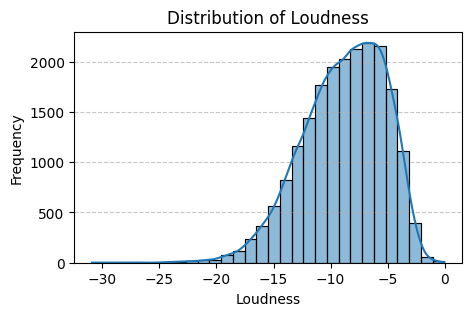

In [103]:
plt.figure(figsize=(5, 3))
sns.histplot(df.loudness[df.loudness<0], bins=30, kde=True)

plt.xlabel('Loudness')
plt.ylabel('Frequency')
plt.title('Distribution of Loudness')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

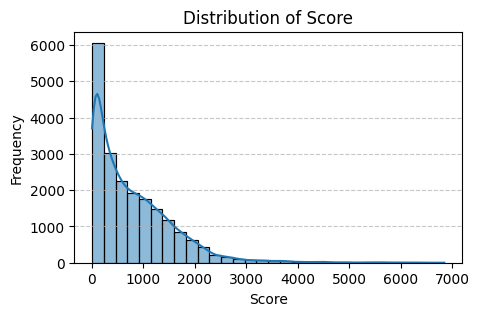

In [5]:
plt.figure(figsize=(5, 3))
sns.histplot(df['score'], bins=30, kde=True)

plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Text(0.5, 1.0, 'Distribution of Log-Transformed Score')

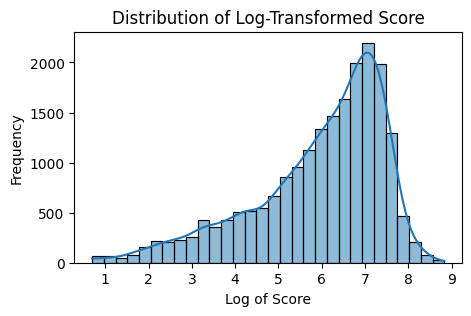

In [6]:
df['log_score'] = np.log(df['score'] + 1)

plt.figure(figsize=(5, 3))
sns.histplot(df['log_score'], bins=30, kde=True)

plt.xlabel('Log of Score')
plt.ylabel('Frequency')
plt.title('Distribution of Log-Transformed Score')

In [109]:
def load_and_examine_data(file_path):
    """Load the data and print basic information"""
    df = pd.read_csv(file_path)
    
    print("=== Basic Dataset Information ===")
    print("\nShape:", df.shape)
    print("\nColumns:", df.columns.tolist())
    print("\n=== Data Types ===")
    print(df.dtypes)
    print("\n=== Missing Values ===")
    print(df.isnull().sum())
    
    return df

In [110]:
def analyze_target_variable(df):
    """Analyze the target variable (score)"""
    print("\n=== Target Variable Analysis ===")
    print("\nScore Statistics:")
    print(df['score'].describe())
    
    plt.figure(figsize=(15, 5))
    
    # Distribution plot
    plt.subplot(1, 2, 1)
    sns.histplot(df['score'], kde=True)
    plt.title('Distribution of Song Success Score')
    plt.xlabel('Score')
    
    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df['score'])
    plt.title('Box Plot of Score')
    
    plt.tight_layout()
    plt.show()
    
    # Check for skewness and kurtosis
    print("\nSkewness:", stats.skew(df['score']))
    print("Kurtosis:", stats.kurtosis(df['score']))

In [111]:
def analyze_numerical_features(df):
    """Analyze numerical features"""
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    numerical_features = numerical_features[numerical_features != 'score']
    
    print("\n=== Numerical Features Analysis ===")
    
    # Statistics for numerical features
    print("\nNumerical Features Statistics:")
    print(df[numerical_features].describe())
    
    # Distribution plots
    for i in range(0, len(numerical_features), 3):
        plt.figure(figsize=(15, 5))
        for j in range(3):
            if i + j < len(numerical_features):
                plt.subplot(1, 3, j+1)
                sns.histplot(df[numerical_features[i+j]], kde=True)
                plt.title(f'Distribution of {numerical_features[i+j]}')
        plt.tight_layout()
        plt.show()
    
    # Correlation with target
    correlations = df[numerical_features].corrwith(df['score'])
    plt.figure(figsize=(12, 6))
    correlations.sort_values().plot(kind='bar')
    plt.title('Correlation with Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [112]:
def analyze_categorical_features(df):
    """Analyze categorical features"""
    categorical_features = df.select_dtypes(include=['object', 'bool']).columns
    
    print("\n=== Categorical Features Analysis ===")
    
    for feature in categorical_features:
        print(f"\nValue counts for {feature}:")
        print(df[feature].value_counts().head())
        print(f"Number of unique values: {df[feature].nunique()}")
        
        plt.figure(figsize=(10, 5))
        if df[feature].nunique() < 10:  # Only plot if fewer than 10 unique values
            sns.boxplot(x=feature, y='score', data=df)
            plt.title(f'Score Distribution by {feature}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

In [113]:
def analyze_temporal_trends(df):
    """Analyze trends over release_year"""
    plt.figure(figsize=(15, 5))
    
    # Average score by year
    yearly_avg = df.groupby('release_year')['score'].mean()
    plt.plot(yearly_avg.index, yearly_avg.values)
    plt.title('Average Score by Release Year')
    plt.xlabel('Release Year')
    plt.ylabel('Average Score')
    plt.tight_layout()
    plt.show()

In [114]:
def analyze_correlations(df):
    """Analyze correlations between features"""
    # Select numerical features
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

In [115]:
def analyze_feature_importance(df):
    """Analyze feature importance using mutual information"""
    # Prepare features
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    numerical_features = numerical_features[numerical_features != 'score']
    
    # Calculate mutual information scores
    mi_scores = mutual_info_regression(df[numerical_features], df['score'])
    
    # Plot feature importance
    plt.figure(figsize=(12, 6))
    importance_df = pd.DataFrame({'feature': numerical_features, 'importance': mi_scores})
    importance_df = importance_df.sort_values('importance', ascending=True)
    plt.barh(importance_df['feature'], importance_df['importance'])
    plt.title('Feature Importance (Mutual Information)')
    plt.xlabel('Mutual Information Score')
    plt.tight_layout()
    plt.show()

In [116]:
def detect_outliers(df):
    """Detect outliers using IQR method"""
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    
    print("\n=== Outlier Analysis ===")
    for feature in numerical_features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[feature] < Q1 - 1.5 * IQR) | (df[feature] > Q3 + 1.5 * IQR)][feature]
        if len(outliers) > 0:
            print(f"\nOutliers in {feature}:")
            print(f"Number of outliers: {len(outliers)}")
            print(f"Percentage of outliers: {(len(outliers) / len(df) * 100):.2f}%")

In [117]:
df = load_and_examine_data('../data/dataset.csv')

=== Basic Dataset Information ===

Shape: (20402, 21)

Columns: ['score', 'release_year', 'duration_ms', 'key', 'mode', 'time_signature', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo', 'explicit', 'song_type', 'followers', 'popularity', 'artist_type', 'main_genre']

=== Data Types ===
score                 int64
release_year          int64
duration_ms           int64
key                   int64
mode                  int64
time_signature        int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
valence             float64
tempo               float64
explicit               bool
song_type            object
followers           float64
popularity          float64
artist_type          object
main_genre           object
dtype: object

=== Missing Values ===
score         


=== Target Variable Analysis ===

Score Statistics:
count    20402.000000
mean       777.384521
std        766.740996
min          1.000000
25%        170.000000
50%        563.000000
75%       1181.000000
max       6851.000000
Name: score, dtype: float64


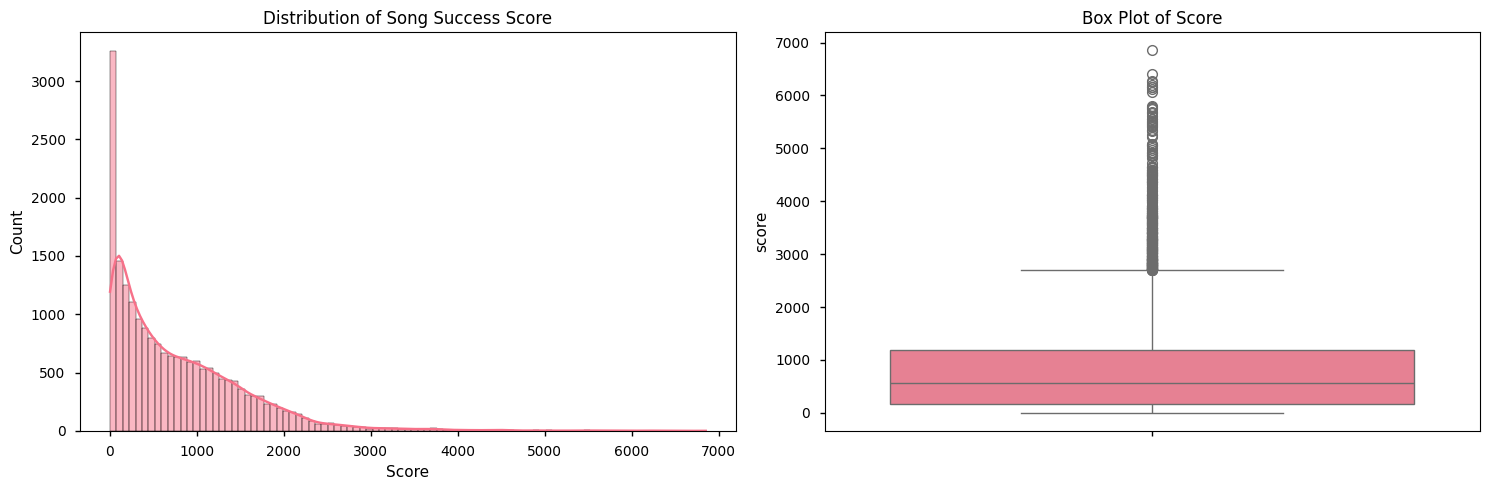


Skewness: 1.6995306751289703
Kurtosis: 4.797648624966671


In [118]:
analyze_target_variable(df)


=== Numerical Features Analysis ===

Numerical Features Statistics:
       release_year   duration_ms           key          mode  time_signature  \
count  20402.000000  2.040200e+04  20402.000000  20402.000000    20402.000000   
mean    1987.499069  2.295247e+05      5.224537      0.726988        3.943584   
std       16.414883  6.696398e+04      3.566935      0.445518        0.289183   
min     1964.000000  2.460400e+04      0.000000      0.000000        0.000000   
25%     1972.250000  1.864930e+05      2.000000      0.000000        4.000000   
50%     1985.000000  2.230260e+05      5.000000      1.000000        4.000000   
75%     2002.000000  2.596930e+05      8.000000      1.000000        4.000000   
max     2018.000000  1.561133e+06     11.000000      1.000000        5.000000   

       acousticness  danceability        energy  instrumentalness  \
count  20402.000000  20402.000000  20402.000000      20402.000000   
mean       0.265215      0.600356      0.625031          0.0475

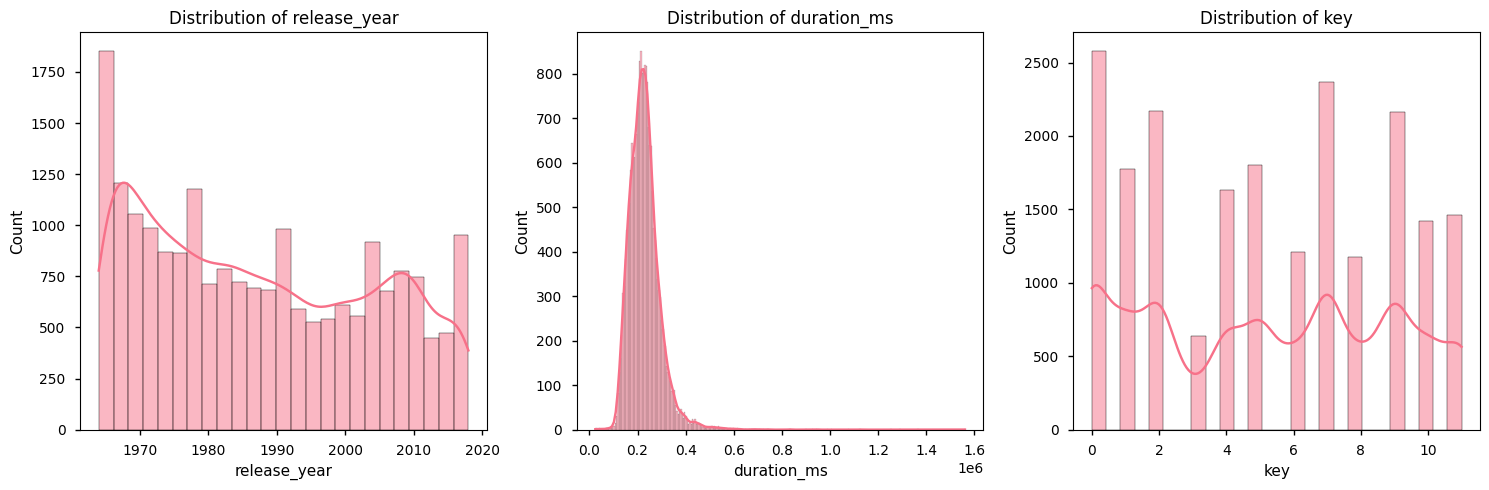

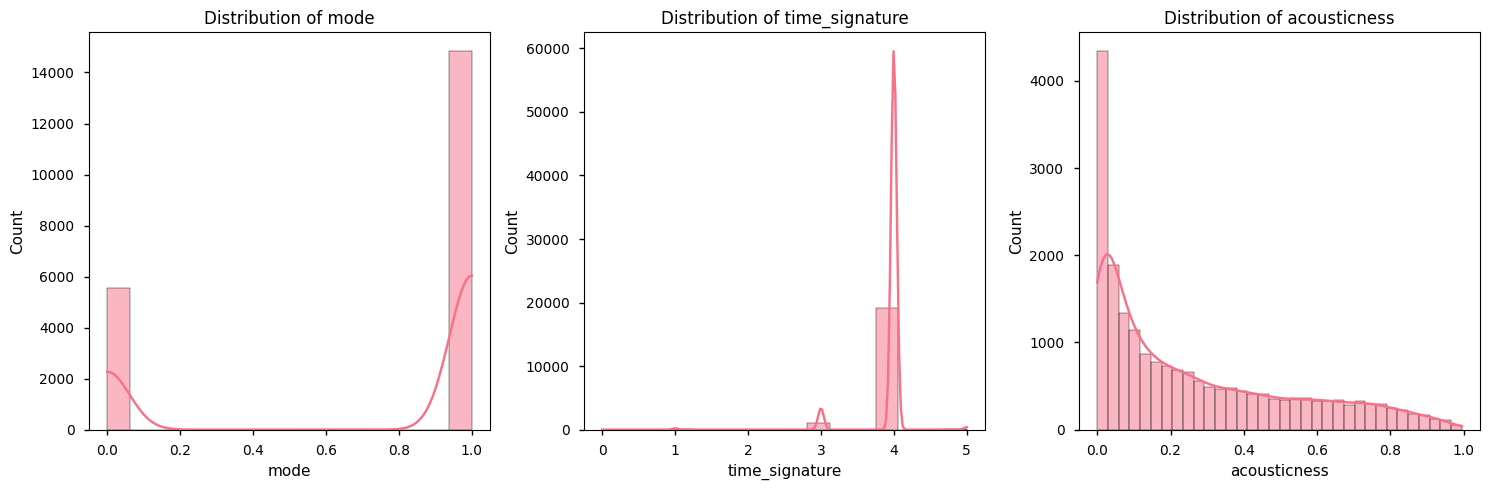

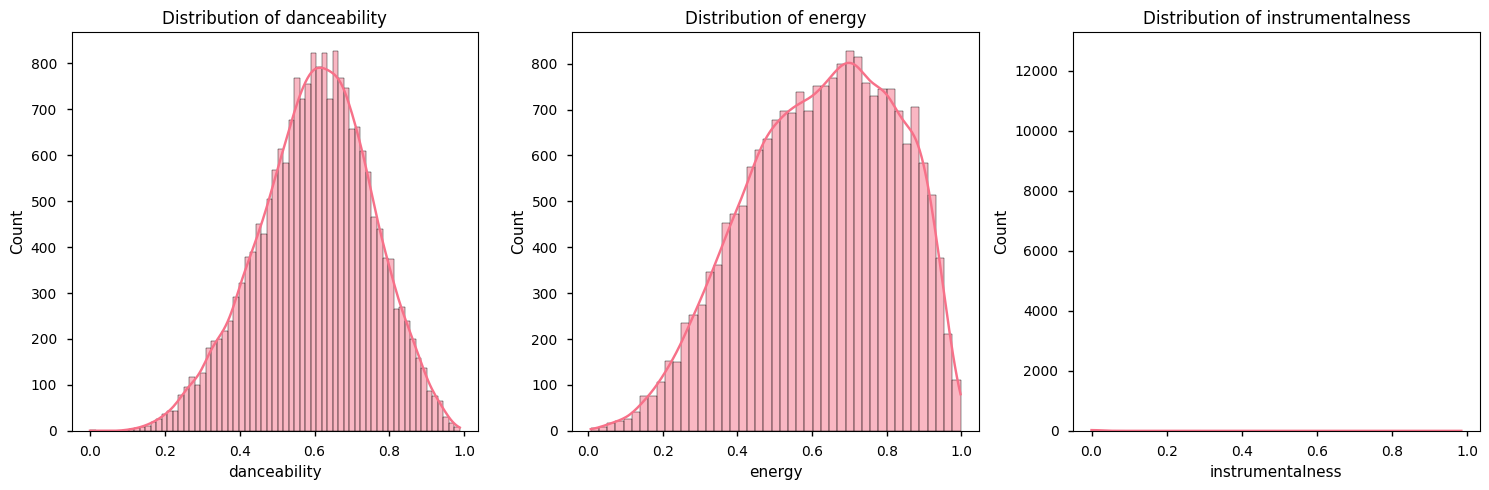

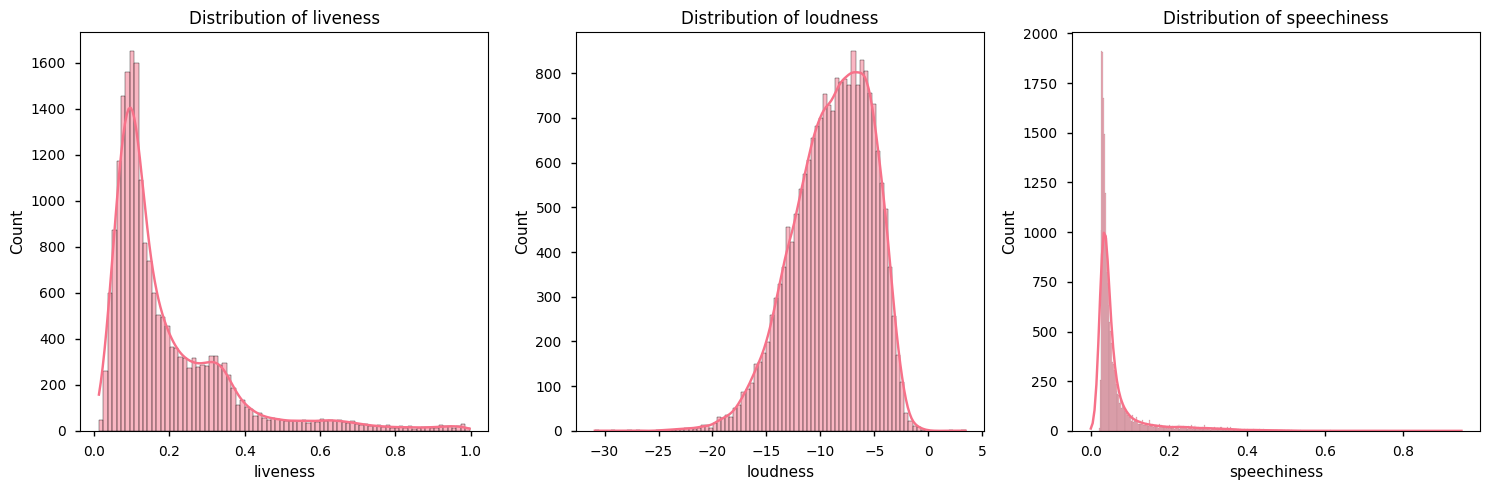

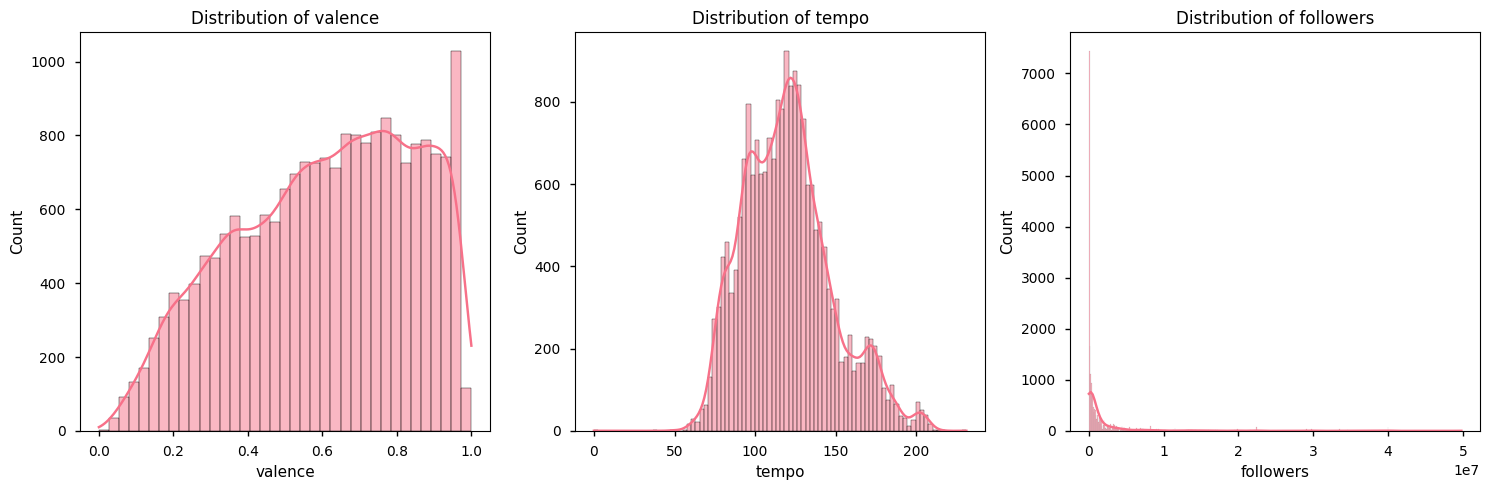

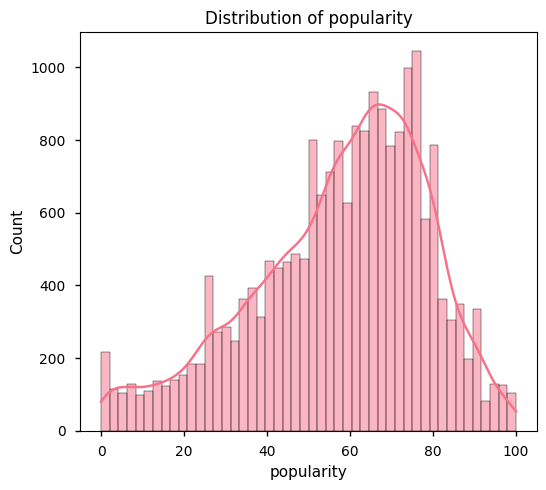

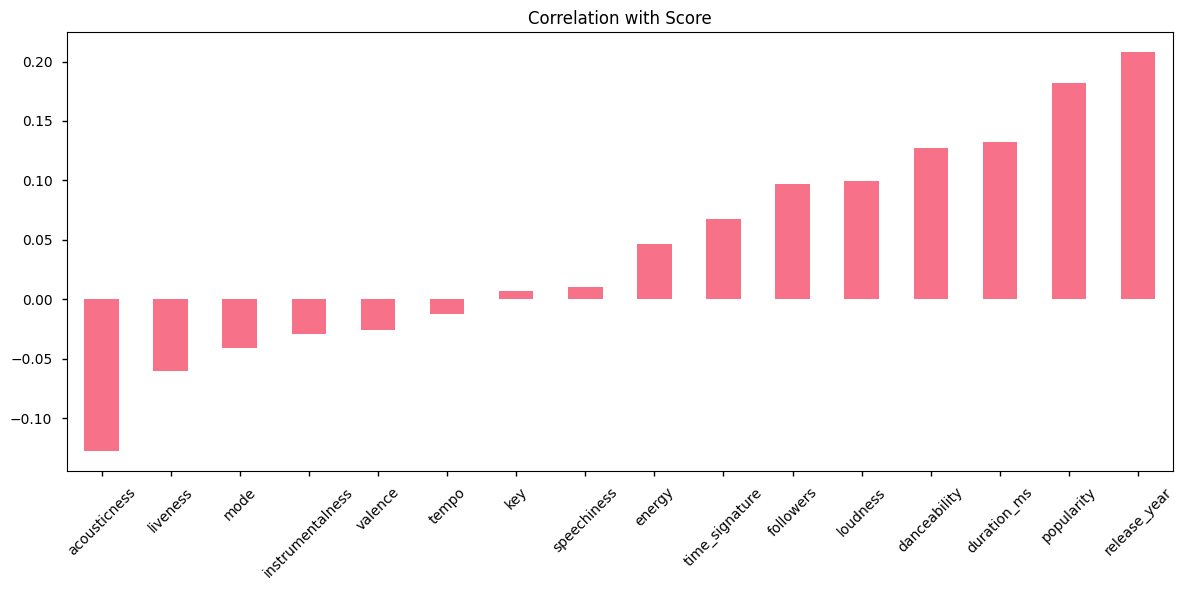

In [119]:
analyze_numerical_features(df)


=== Categorical Features Analysis ===

Value counts for explicit:
explicit
False    18740
True      1662
Name: count, dtype: int64
Number of unique values: 2


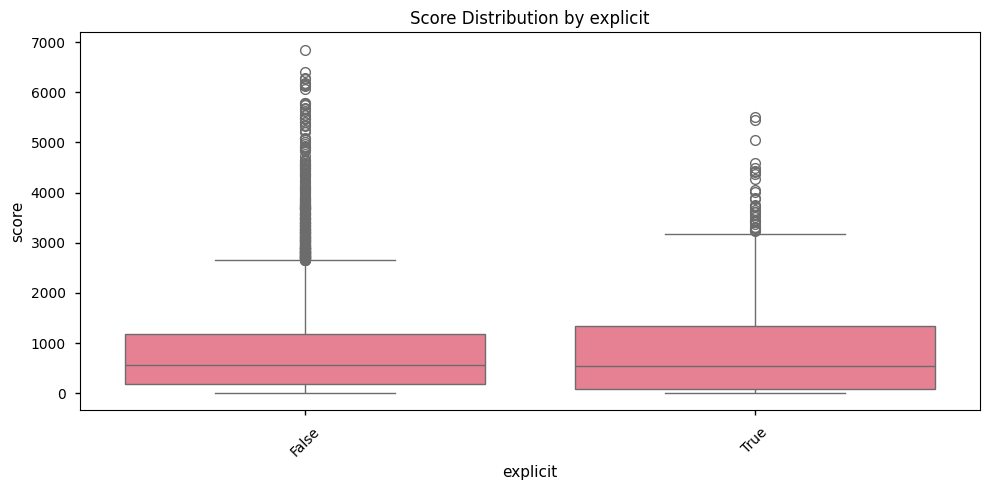


Value counts for song_type:
song_type
Solo             18975
Collaboration     1427
Name: count, dtype: int64
Number of unique values: 2


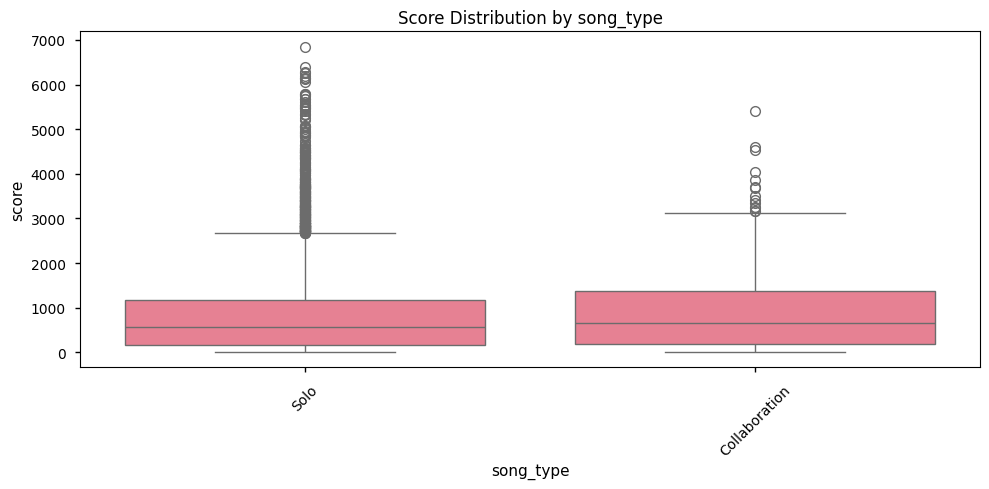


Value counts for artist_type:
artist_type
singer    8039
band      6775
-         4164
rapper     895
duo        458
Name: count, dtype: int64
Number of unique values: 6


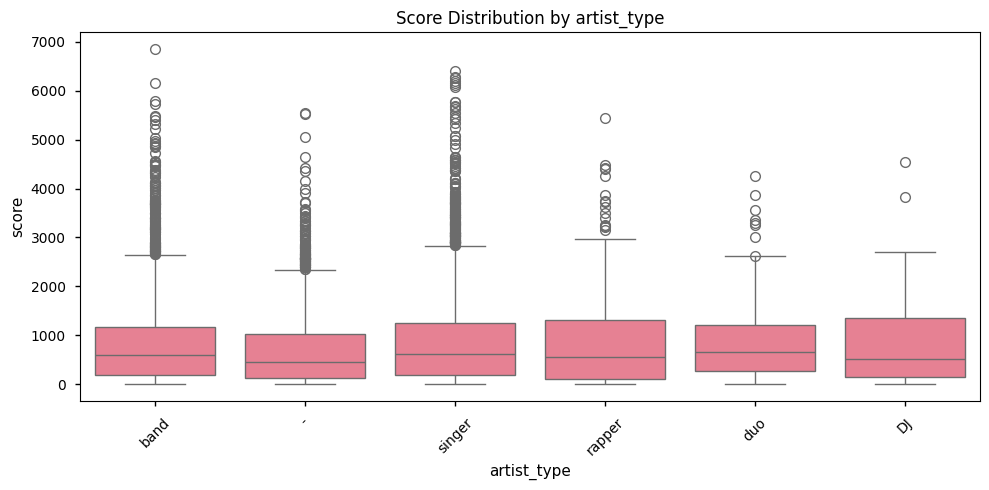


Value counts for main_genre:
main_genre
album rock              2218
-                       2209
adult standards         1720
dance pop               1661
contemporary country    1183
Name: count, dtype: int64
Number of unique values: 492


<Figure size 1000x500 with 0 Axes>

In [120]:
analyze_categorical_features(df)

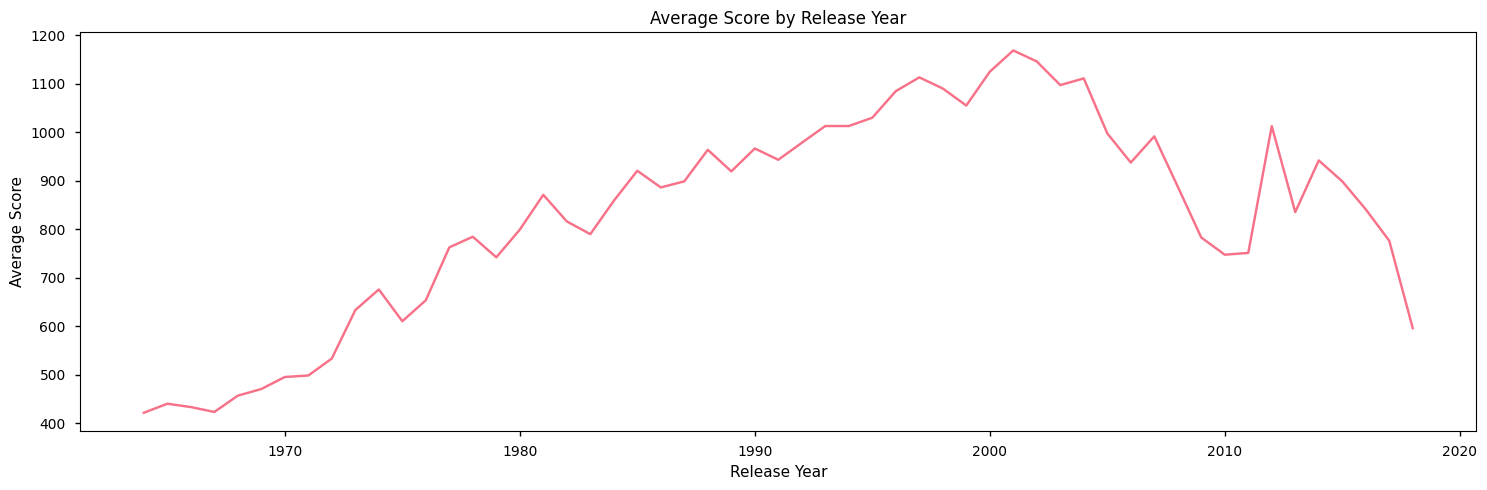

In [121]:
analyze_temporal_trends(df)

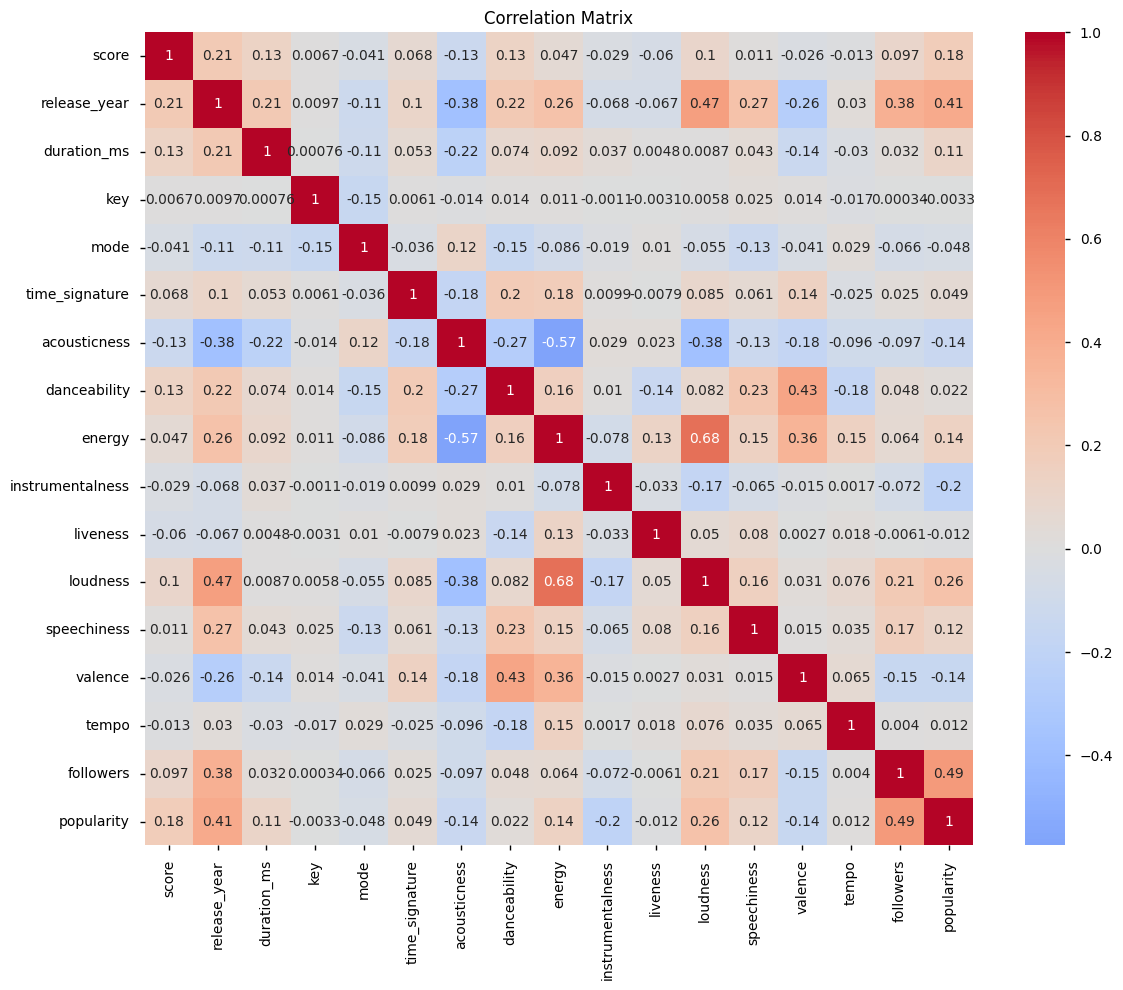

In [122]:
analyze_correlations(df)

In [123]:
analyze_feature_importance(df)

ValueError: Input X contains NaN.

In [124]:
detect_outliers(df)


=== Outlier Analysis ===

Outliers in score:
Number of outliers: 465
Percentage of outliers: 2.28%

Outliers in duration_ms:
Number of outliers: 590
Percentage of outliers: 2.89%

Outliers in time_signature:
Number of outliers: 1268
Percentage of outliers: 6.22%

Outliers in danceability:
Number of outliers: 85
Percentage of outliers: 0.42%

Outliers in energy:
Number of outliers: 6
Percentage of outliers: 0.03%

Outliers in instrumentalness:
Number of outliers: 4256
Percentage of outliers: 20.86%

Outliers in liveness:
Number of outliers: 1244
Percentage of outliers: 6.10%

Outliers in loudness:
Number of outliers: 144
Percentage of outliers: 0.71%

Outliers in speechiness:
Number of outliers: 2625
Percentage of outliers: 12.87%

Outliers in tempo:
Number of outliers: 271
Percentage of outliers: 1.33%

Outliers in followers:
Number of outliers: 2759
Percentage of outliers: 13.52%

Outliers in popularity:
Number of outliers: 95
Percentage of outliers: 0.47%
